In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets

iris=datasets.load_iris()###纸鸢花数据集
x=iris.data[:,:2]
y=iris.target

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=666)

In [4]:
from sklearn.linear_model import   LogisticRegression
#####scikit leran中自动添加了多分类OVR和OVO
 
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)#############penalty='l2  :默认使用L2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
log_reg.score(x_train,y_train) ###默认OVR


0.7232142857142857

In [6]:
log_reg.score(x_test,y_test)

0.6578947368421053

In [7]:
def plot_decision_boundary(model,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)) ,
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100))
    )
    x_new=np.c_[x0.ravel(),x1.ravel()]
    
    y_predict=model.predict(x_new)
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


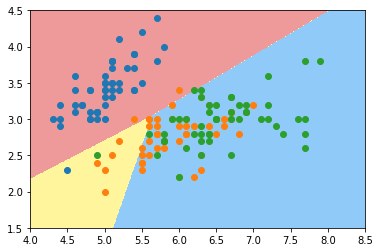

In [8]:
plot_decision_boundary(log_reg,axis=[4,8.5,1.5,4.5]) ####使用逻辑回归线性模型
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.show()

In [11]:
log_reg2=LogisticRegression(multi_class='multinomial',solver='newton-cg')#####  OVO


In [12]:
log_reg2.fit(x_train,y_train)
log_reg2.score(x_test,y_test)

0.7894736842105263

plot_decision_boundary(log_reg2,axis=[4,8.5,1.5,4.5]) ####使用逻辑回归线性模型
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.show()

### 使用所有数据 

In [14]:
x=iris.data
y=iris.target

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=666)

In [15]:
log_reg3=LogisticRegression()#####  默认OVR

log_reg3.fit(x_train,y_train)
log_reg3.score(x_test,y_test)

0.9473684210526315

In [16]:
log_reg4=LogisticRegression(multi_class='multinomial',solver='newton-cg')##OVO
log_reg4.fit(x_train,y_train)
log_reg4.score(x_test,y_test)

1.0

### scikit-learn 自带的类OVO和OVR

In [17]:
from sklearn.multiclass import OneVsRestClassifier
ovr=OneVsRestClassifier(log_reg)
ovr.fit(x_train,y_train)
ovr.score(x_test,y_test)

0.9736842105263158

In [19]:
from sklearn.multiclass import OneVsOneClassifier
ovo=OneVsOneClassifier(log_reg)
ovo.fit(x_train,y_train)
ovo.score(x_test,y_test)

1.0

拓展了线性回归算法，通过估算概率，将回归问题转化为了概率问题。